In [5]:
import pandas as pd


In [6]:
coffee = pd.read_csv('./data/coffee.csv')



In [7]:
coffee.loc[1, 'Units Sold'] = 10 #reset value on row 1, column 'Units Sold'
coffee.head(10)




,Day,Coffee Type,Units Sold
0,Monday,Espresso,25
1,Monday,Latte,10
2,Tuesday,Espresso,30
3,Tuesday,Latte,20
4,Wednesday,Espresso,35
5,Wednesday,Latte,25
6,Thursday,Espresso,40
7,Thursday,Latte,30
8,Friday,Espresso,45
9,Friday,Latte,35


In [8]:
results = pd.read_parquet('./data/results.parquet')

results.head()


,year,type,discipline,event,as,athlete_id,noc,team,place,tied,medal
0,1912.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,None,17.0,True,None
1,1912.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jean Montariol,NaN,False,None
2,1920.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,None,32.0,True,None
3,1920.0,Summer,Tennis,"Doubles, Mixed (Olympic)",Jean-François Blanchy,1,FRA,Jeanne Vaussard,8.0,True,None
4,1920.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jacques Brugnon,4.0,False,None


# Filtering Data

In [9]:
bios = pd.read_csv('./data/bios.csv')
bios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145500 entries, 0 to 145499
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   athlete_id    145500 non-null  int64  
 1   name          145500 non-null  object 
 2   born_date     143693 non-null  object 
 3   born_city     110908 non-null  object 
 4   born_region   110908 non-null  object 
 5   born_country  110908 non-null  object 
 6   NOC           145499 non-null  object 
 7   height_cm     106651 non-null  float64
 8   weight_kg     102070 non-null  float64
 9   died_date     33940 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 11.1+ MB


In [10]:
#.loc is used to access groups of rows and columns
bios.loc[(bios['height_cm'] > 215) & (bios['born_country'] == 'USA'), ["name", "born_country", "height_cm", "weight_kg"]] 

,name,born_country,height_cm,weight_kg
5781,Tommy Burleson,USA,223.0,102.0
6722,Shaquille O'Neal,USA,216.0,137.0
6937,David Robinson,USA,216.0,107.0
123850,Tyson Chandler,USA,216.0,107.0


In [11]:
bios[bios['name'].str.contains("Shaq")] #Names that contain "Shaq"

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
6722,6755,Shaquille O'Neal,1972-03-06,Newark,New Jersey,USA,United States,216.0,137.0,NaN
143978,147636,Shaquille Moosa,2002-04-10,NaN,NaN,NaN,Zambia,NaN,NaN,NaN


In [12]:
bios[bios['name'].str.contains("Amade")] #Athletes with my name

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
24718,24907,Amadeo,1905-03-31,Pasajes,Guipúzcoa,ESP,Spain,NaN,NaN,1989-07-30
74464,75036,Amadeo Francis,1931-10-22,NaN,NaN,NaN,Puerto Rico,187.0,77.0,NaN
79362,79971,Amadeo Zinzi,NaN,NaN,NaN,NaN,Italy,NaN,NaN,NaN


In [13]:
bios[(bios['born_city'].str.contains("San Rafael", na=False)) & (bios['born_region'] == "California")]

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
16998,17116,Emile Waldteufel,1944-12-03,San Rafael,California,USA,United States,175.0,71.0,NaN


[Emile Waldteufel (cyclist)](https://en.wikipedia.org/wiki/Emile_Waldteufel_(cyclist))

In [14]:
bios.query('born_country == "USA" and born_city == "San Francisco"')

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
7290,7329,Jim Walsh,1930-08-29,San Francisco,California,USA,United States,193.0,86.0,1976-03-04
8619,8666,George Finnegan,1881-09-28,San Francisco,California,USA,United States,NaN,NaN,1913-02-28
8639,8686,Frank Haller,1883-01-06,San Francisco,California,USA,United States,NaN,NaN,1939-04-30
10981,11038,DeAnne Hemmens,1964-07-02,San Francisco,California,USA,United States,NaN,NaN,NaN
13025,13097,Susan DeMattei,1962-10-15,San Francisco,California,USA,United States,165.0,57.0,NaN
...,...,...,...,...,...,...,...,...,...,...
143517,147169,Kate Courtney,1995-10-29,San Francisco,California,USA,United States,163.0,52.0,NaN
143534,147187,Danielle Kang,1992-10-20,San Francisco,California,USA,United States,168.0,NaN,NaN
143570,147223,Kenny Chase,1994-08-25,San Francisco,California,USA,United States,183.0,79.0,NaN
143731,147386,Joe Speer Ryan,1996-06-05,San Francisco,California,USA,United States,188.0,NaN,NaN


# Adding/Removing Columns

In [15]:
coffee['price'] = 4.99 #Add new column price

coffee.head(10)

,Day,Coffee Type,Units Sold,price
0,Monday,Espresso,25,4.99
1,Monday,Latte,10,4.99
2,Tuesday,Espresso,30,4.99
3,Tuesday,Latte,20,4.99
4,Wednesday,Espresso,35,4.99
5,Wednesday,Latte,25,4.99
6,Thursday,Espresso,40,4.99
7,Thursday,Latte,30,4.99
8,Friday,Espresso,45,4.99
9,Friday,Latte,35,4.99


In [16]:
import numpy as np

coffee_new = coffee.copy() #Copy coffee dataframe to coffee_new, otherwise it will change the original dataframe

coffee_new['price'] = 3.99 #Add new column price with value 3.99

coffee['new_price'] = np.where(coffee['Coffee Type'] == 'Espresso', 2.99, 4.99) #Add new column new_price with condition

coffee_new.head()

,Day,Coffee Type,Units Sold,price
0,Monday,Espresso,25,3.99
1,Monday,Latte,10,3.99
2,Tuesday,Espresso,30,3.99
3,Tuesday,Latte,20,3.99
4,Wednesday,Espresso,35,3.99


In [17]:
#coffee.drop(columns = ['price']) #Drop column price, use inplace to make it permanent

coffee['revenue'] = coffee['Units Sold'] * coffee['new_price'] #Add new column revenue
coffee.head()


,Day,Coffee Type,Units Sold,price,new_price,revenue
0,Monday,Espresso,25,4.99,2.99,74.75
1,Monday,Latte,10,4.99,4.99,49.90
2,Tuesday,Espresso,30,4.99,2.99,89.70
3,Tuesday,Latte,20,4.99,4.99,99.80
4,Wednesday,Espresso,35,4.99,2.99,104.65


In [18]:
coffee.rename(columns={'new_price': 'price'}, inplace=True) #Rename column new_price to price

In [19]:
bios_new = bios.copy()

bios_new['first_name'] = bios_new['name'].str.split(' ').str[0] #Add new column first_name with first name of name column
bios_new['last_name'] = bios_new['name'].str.split(' ').str[1] #Add new column last_name with last name of name column

bios_new.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,first_name,last_name
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02,Jean-François,Blanchy
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN,Arnaud,Boetsch
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17,Jean,Borotra
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20,Jacques,Brugnon
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25,Albert,Canet


In [20]:
bios_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145500 entries, 0 to 145499
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   athlete_id    145500 non-null  int64  
 1   name          145500 non-null  object 
 2   born_date     143693 non-null  object 
 3   born_city     110908 non-null  object 
 4   born_region   110908 non-null  object 
 5   born_country  110908 non-null  object 
 6   NOC           145499 non-null  object 
 7   height_cm     106651 non-null  float64
 8   weight_kg     102070 non-null  float64
 9   died_date     33940 non-null   object 
 10  first_name    145500 non-null  object 
 11  last_name     145500 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 13.3+ MB


In [21]:
bios_new['born_datetime'] = pd.to_datetime(bios_new['born_date'], format="%Y-%m-%d") #Convert born_date to datetime

bios_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145500 entries, 0 to 145499
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   athlete_id     145500 non-null  int64         
 1   name           145500 non-null  object        
 2   born_date      143693 non-null  object        
 3   born_city      110908 non-null  object        
 4   born_region    110908 non-null  object        
 5   born_country   110908 non-null  object        
 6   NOC            145499 non-null  object        
 7   height_cm      106651 non-null  float64       
 8   weight_kg      102070 non-null  float64       
 9   died_date      33940 non-null   object        
 10  first_name     145500 non-null  object        
 11  last_name      145500 non-null  object        
 12  born_datetime  143693 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(9)
memory usage: 14.4+ MB


In [22]:
bios_new['born_year'] = bios_new['born_datetime'].dt.year #Extract year from born_datetime

bios_new[['name', 'born_year']].head()

,name,born_year
0,Jean-François Blanchy,1886.0
1,Arnaud Boetsch,1969.0
2,Jean Borotra,1898.0
3,Jacques Brugnon,1895.0
4,Albert Canet,1878.0


In [23]:
bios_new.to_csv('./data/bios_new.csv', index=False) #Save bios_new to csv

In [24]:
bios['height_category'] = bios['height_cm'].apply(lambda x: 'short' if x < 170 else 'tall') #Add new column height_category with condition
bios[['name', 'height_category']].head()

,name,height_category
0,Jean-François Blanchy,tall
1,Arnaud Boetsch,tall
2,Jean Borotra,tall
3,Jacques Brugnon,short
4,Albert Canet,tall


In [25]:
bios.head()

def categorize_athlete(row):
    if row['height_cm'] < 170 and row['weight_kg'] < 70:
        return 'lightweight'
    elif row['height_cm'] < 180 and row['weight_kg'] < 80:
        return 'middleweight'
    else:
        return 'heavyweight'
    

bios['athlete_category'] = bios.apply(categorize_athlete, axis=1) #Add new column athlete_category with condition
#axis=1 is used to apply function to each row, axis=0 is used to apply to each column
bios.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,height_category,athlete_category
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02,tall,heavyweight
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN,tall,heavyweight
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17,tall,heavyweight
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20,short,lightweight
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25,tall,heavyweight


# Merging & Concatenating data

In [26]:
nocs = pd.read_csv('./data/noc_regions.csv')

In [27]:
nocs.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [28]:
bios_new = pd.merge(bios, nocs, left_on='born_country', right_on='NOC', how='inner') #Merge bios and nocs on born_country and NOC

In [29]:
bios_new.rename(columns={'region': 'born_country_full'}, inplace=True) #Rename column region to born_country_full

In [30]:
usa = bios[bios['born_country'] == 'USA']   #Filter bios for USA
gbr = bios[bios['born_country'] == 'GBR']   #Filter bios for GBR

usa.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,height_category,athlete_category
54,55,Monique Javer,1967-07-22,Burlingame,California,USA,Great Britain,177.0,64.0,NaN,tall,middleweight
960,964,Xóchitl Escobedo,1968-09-17,West Covina,California,USA,Mexico,170.0,60.0,NaN,tall,middleweight
961,965,Angélica Gavaldón,1973-10-03,El Centro,California,USA,Mexico,160.0,54.0,NaN,short,lightweight
1231,1238,Bert Schneider,1897-07-01,Cleveland,Ohio,USA,Canada,NaN,NaN,1986-02-20,tall,heavyweight
1345,1352,Laura Berg,1975-01-06,Santa Fe Springs,California,USA,United States,168.0,61.0,NaN,short,lightweight


In [31]:
new_df = pd.concat([usa, gbr]) #Concatenate usa and gbr
new_df.head()
new_df.tail()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,height_category,athlete_category
144811,148512,Benjamin Alexander,1983-05-08,London,England,GBR,Jamaica,NaN,NaN,NaN,tall,heavyweight
144815,148517,Ashley Watson,1993-10-28,Peterborough,England,GBR,Jamaica,NaN,NaN,NaN,tall,heavyweight
145005,148716,Peder Kongshaug,2001-08-13,Wimbledon,England,GBR,Norway,184.0,86.0,NaN,tall,heavyweight
145319,149041,Axel Brown,1992-04-02,Harrogate,England,GBR,Trinidad and Tobago,NaN,NaN,NaN,tall,heavyweight
145388,149111,Jean-Luc Baker,1993-10-07,Burnley,England,GBR,United States,NaN,NaN,NaN,tall,heavyweight


In [32]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308408 entries, 0 to 308407
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   year        305807 non-null  float64
 1   type        305807 non-null  object 
 2   discipline  308407 non-null  object 
 3   event       308408 non-null  object 
 4   as          308408 non-null  object 
 5   athlete_id  308408 non-null  int64  
 6   noc         308407 non-null  object 
 7   team        121714 non-null  object 
 8   place       283193 non-null  float64
 9   tied        308408 non-null  bool   
 10  medal       44139 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(7)
memory usage: 23.8+ MB


In [33]:
bios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145500 entries, 0 to 145499
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   athlete_id        145500 non-null  int64  
 1   name              145500 non-null  object 
 2   born_date         143693 non-null  object 
 3   born_city         110908 non-null  object 
 4   born_region       110908 non-null  object 
 5   born_country      110908 non-null  object 
 6   NOC               145499 non-null  object 
 7   height_cm         106651 non-null  float64
 8   weight_kg         102070 non-null  float64
 9   died_date         33940 non-null   object 
 10  height_category   145500 non-null  object 
 11  athlete_category  145500 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 13.3+ MB


In [34]:
combined_df = pd.merge(results, bios, on='athlete_id', how='left') #Merge results and bios on athlete_id
combined_df.head()

,year,type,discipline,event,as,athlete_id,noc,team,place,tied,...,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,height_category,athlete_category
0,1912.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,None,17.0,True,...,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02,tall,heavyweight
1,1912.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jean Montariol,NaN,False,...,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02,tall,heavyweight
2,1920.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,None,32.0,True,...,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02,tall,heavyweight
3,1920.0,Summer,Tennis,"Doubles, Mixed (Olympic)",Jean-François Blanchy,1,FRA,Jeanne Vaussard,8.0,True,...,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02,tall,heavyweight
4,1920.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jacques Brugnon,4.0,False,...,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02,tall,heavyweight


# Handling Null Values

In [35]:
coffee.head()

,Day,Coffee Type,Units Sold,price,price,revenue
0,Monday,Espresso,25,4.99,2.99,74.75
1,Monday,Latte,10,4.99,4.99,49.90
2,Tuesday,Espresso,30,4.99,2.99,89.70
3,Tuesday,Latte,20,4.99,4.99,99.80
4,Wednesday,Espresso,35,4.99,2.99,104.65


In [36]:
coffee.loc[[2,3], "Units Sold"] = np.nan #Set values to NaN
coffee.loc[[0,1], "Units Sold"] = 15
coffee["Units Sold"].interpolate() #Interpolate missing values



0     15.000000
1     15.000000
2     21.666667
3     28.333333
4     35.000000
5     25.000000
6     40.000000
7     30.000000
8     45.000000
9     35.000000
10    45.000000
11    35.000000
12    45.000000
13    35.000000
Name: Units Sold, dtype: float64

# Aggregating Data

In [37]:
bios['born_city'].value_counts() #Count values in born_city

born_city
Budapest           1378
Moskva (Moscow)     883
Oslo                708
Stockholm           629
Praha (Prague)      600
                   ... 
Kirovgrad             1
Pereiaslav            1
Podgornyy             1
Kudepsta              1
Furmanov              1
Name: count, Length: 22368, dtype: int64

In [38]:
bios[bios['born_country'] == 'USA']['born_region'].value_counts() #Count values in born_city for USA

born_region
California              1634
New York                 990
Illinois                 585
Massachusetts            530
Pennsylvania             530
New Jersey               381
Texas                    368
Minnesota                365
Ohio                     328
Michigan                 319
Washington               240
Florida                  235
Wisconsin                209
Colorado                 207
Connecticut              156
Indiana                  150
Oregon                   132
Georgia                  129
Virginia                 121
Maryland                 117
District of Columbia     107
Iowa                     102
Hawaiʻi                   95
Kansas                    94
Oklahoma                  93
Louisiana                 92
Utah                      91
Missouri                  91
North Carolina            86
Arizona                   83
New Hampshire             83
Vermont                   68
Mississippi               66
Alabama                   64
Ke

In [39]:
bios['born_date'] = pd.to_datetime(bios['born_date'], format="%Y-%m-%d") #Convert born_date to datetime
bios['month_born'] = bios['born_date'].dt.month #Extract month from born_date
bios['year_born'] = bios['born_date'].dt.year #Extract year from born_date

bios.groupby([bios['year_born'], bios['month_born']])['name'].count().reset_index().sort_values(by='name', ascending=False) #Group by year_born and month_born and count names

,year_born,month_born,name
1437,1970.0,1.0,239
1461,1972.0,1.0,229
1497,1975.0,1.0,227
1629,1986.0,1.0,227
1617,1985.0,1.0,225
...,...,...,...
1877,2006.0,12.0,1
1871,2006.0,3.0,1
20,1846.0,7.0,1
21,1846.0,8.0,1


# Advanced Functionality

In [40]:
coffee['yesterday_revenue'] = coffee['revenue'].shift(1) #Add new column yesterday_revenue with previous day revenue
coffee

,Day,Coffee Type,Units Sold,price,price,revenue,yesterday_revenue
0,Monday,Espresso,15.0,4.99,2.99,74.75,NaN
1,Monday,Latte,15.0,4.99,4.99,49.90,74.75
2,Tuesday,Espresso,NaN,4.99,2.99,89.70,49.90
3,Tuesday,Latte,NaN,4.99,4.99,99.80,89.70
4,Wednesday,Espresso,35.0,4.99,2.99,104.65,99.80
5,Wednesday,Latte,25.0,4.99,4.99,124.75,104.65
6,Thursday,Espresso,40.0,4.99,2.99,119.60,124.75
7,Thursday,Latte,30.0,4.99,4.99,149.70,119.60
8,Friday,Espresso,45.0,4.99,2.99,134.55,149.70
9,Friday,Latte,35.0,4.99,4.99,174.65,134.55


In [41]:
coffee['pct_change'] = coffee['revenue'] / coffee['revenue'].shift(1) - 1 #Add new column pct_change with percentage change
coffee

,Day,Coffee Type,Units Sold,price,price,revenue,yesterday_revenue,pct_change
0,Monday,Espresso,15.0,4.99,2.99,74.75,NaN,NaN
1,Monday,Latte,15.0,4.99,4.99,49.90,74.75,-0.332441
2,Tuesday,Espresso,NaN,4.99,2.99,89.70,49.90,0.797595
3,Tuesday,Latte,NaN,4.99,4.99,99.80,89.70,0.112598
4,Wednesday,Espresso,35.0,4.99,2.99,104.65,99.80,0.048597
5,Wednesday,Latte,25.0,4.99,4.99,124.75,104.65,0.192069
6,Thursday,Espresso,40.0,4.99,2.99,119.60,124.75,-0.041283
7,Thursday,Latte,30.0,4.99,4.99,149.70,119.60,0.251672
8,Friday,Espresso,45.0,4.99,2.99,134.55,149.70,-0.101202
9,Friday,Latte,35.0,4.99,4.99,174.65,134.55,0.298030


In [42]:
bios['height_rank'] = bios['height_cm'].rank(ascending=False) #Add new column height_rank with rank

bios.sort_values(by='height_cm', ascending=False).head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,height_category,athlete_category,month_born,year_born,height_rank
89070,89782,Yao Ming,1980-09-12,Xuhui District,Shanghai,CHN,People's Republic of China,226.0,141.0,NaN,tall,heavyweight,9.0,1980.0,1.0
6978,7013,Arvydas Sabonis,1964-12-19,Kaunas,Kaunas,LTU,Lithuania Soviet Union,223.0,122.0,NaN,tall,heavyweight,12.0,1964.0,2.5
5781,5804,Tommy Burleson,1952-02-24,Crossnore,North Carolina,USA,United States,223.0,102.0,NaN,tall,heavyweight,2.0,1952.0,2.5
89075,89787,Roberto Dueñas,1975-11-01,Madrid,Madrid,ESP,Spain,221.0,137.0,NaN,tall,heavyweight,11.0,1975.0,5.0
120266,122147,Zhang Zhaoxu,1987-11-18,Binzhou,Shandong,CHN,People's Republic of China,221.0,110.0,NaN,tall,heavyweight,11.0,1987.0,5.0


In [43]:
coffee['cum_revenue'] = coffee['revenue'].cumsum()
coffee

,Day,Coffee Type,Units Sold,price,price,revenue,yesterday_revenue,pct_change,cum_revenue
0,Monday,Espresso,15.0,4.99,2.99,74.75,NaN,NaN,74.75
1,Monday,Latte,15.0,4.99,4.99,49.90,74.75,-0.332441,124.65
2,Tuesday,Espresso,NaN,4.99,2.99,89.70,49.90,0.797595,214.35
3,Tuesday,Latte,NaN,4.99,4.99,99.80,89.70,0.112598,314.15
4,Wednesday,Espresso,35.0,4.99,2.99,104.65,99.80,0.048597,418.80
5,Wednesday,Latte,25.0,4.99,4.99,124.75,104.65,0.192069,543.55
6,Thursday,Espresso,40.0,4.99,2.99,119.60,124.75,-0.041283,663.15
7,Thursday,Latte,30.0,4.99,4.99,149.70,119.60,0.251672,812.85
8,Friday,Espresso,45.0,4.99,2.99,134.55,149.70,-0.101202,947.40
9,Friday,Latte,35.0,4.99,4.99,174.65,134.55,0.298030,1122.05


In [44]:
latte = coffee[coffee['Coffee Type'] == 'Latte'].copy()

latte['cum_revenue'] = latte['revenue'].rolling(3).sum() #Add new column cum_revenue with rolling sum of 3 days

latte

,Day,Coffee Type,Units Sold,price,price,revenue,yesterday_revenue,pct_change,cum_revenue
1,Monday,Latte,15.0,4.99,4.99,49.90,74.75,-0.332441,NaN
3,Tuesday,Latte,NaN,4.99,4.99,99.80,89.70,0.112598,NaN
5,Wednesday,Latte,25.0,4.99,4.99,124.75,104.65,0.192069,274.45
7,Thursday,Latte,30.0,4.99,4.99,149.70,119.60,0.251672,374.25
9,Friday,Latte,35.0,4.99,4.99,174.65,134.55,0.298030,449.10
11,Saturday,Latte,35.0,4.99,4.99,174.65,134.55,0.298030,499.00
13,Sunday,Latte,35.0,4.99,4.99,174.65,134.55,0.298030,523.95


# New Functionality

In [45]:
import pandas as pd
pd.__version__

'2.2.2'

In [46]:
results_numpy = pd.read_csv('./data/results.csv')
results_arrow = pd.read_csv('./data/results.csv', engine='pyarrow', dtype_backend='pyarrow')

In [47]:
results_numpy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308408 entries, 0 to 308407
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   year        305807 non-null  float64
 1   type        305807 non-null  object 
 2   discipline  308407 non-null  object 
 3   event       308408 non-null  object 
 4   as          308408 non-null  object 
 5   athlete_id  308408 non-null  int64  
 6   noc         308407 non-null  object 
 7   team        121714 non-null  object 
 8   place       283193 non-null  float64
 9   tied        308408 non-null  bool   
 10  medal       44139 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(7)
memory usage: 23.8+ MB


In [48]:
results_arrow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308408 entries, 0 to 308407
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype          
---  ------      --------------   -----          
 0   year        305807 non-null  double[pyarrow]
 1   type        305807 non-null  string[pyarrow]
 2   discipline  308407 non-null  string[pyarrow]
 3   event       308408 non-null  string[pyarrow]
 4   as          308408 non-null  string[pyarrow]
 5   athlete_id  308408 non-null  int64[pyarrow] 
 6   noc         308407 non-null  string[pyarrow]
 7   team        121714 non-null  string[pyarrow]
 8   place       283193 non-null  double[pyarrow]
 9   tied        308408 non-null  bool[pyarrow]  
 10  medal       44139 non-null   string[pyarrow]
dtypes: bool[pyarrow](1), double[pyarrow](2), int64[pyarrow](1), string[pyarrow](7)
memory usage: 37.5 MB


In [49]:
bios = pd.read_csv('./data/bios.csv')
olympians = bios[(bios['born_region'] == 'San Francisco') | (bios['born_region'] == 'New Hampshire')]
olympians.sample(5)

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
99662,100461,Katie King,1975-05-24,Salem,New Hampshire,USA,United States,175.0,77.0,NaN
99660,100459,Tricia Dunn-Luoma,1974-04-25,Derry,New Hampshire,USA,United States,173.0,66.0,NaN
129457,132074,Jessica Parratto,1994-06-26,Dover,New Hampshire,USA,United States,157.0,51.0,NaN
80415,81066,Abbi Fisher,1957-08-30,Conway,New Hampshire,USA,United States,167.0,55.0,NaN
78555,79146,George Underwood,1884-11-04,Manchester,New Hampshire,USA,United States,176.0,74.0,1943-08-28


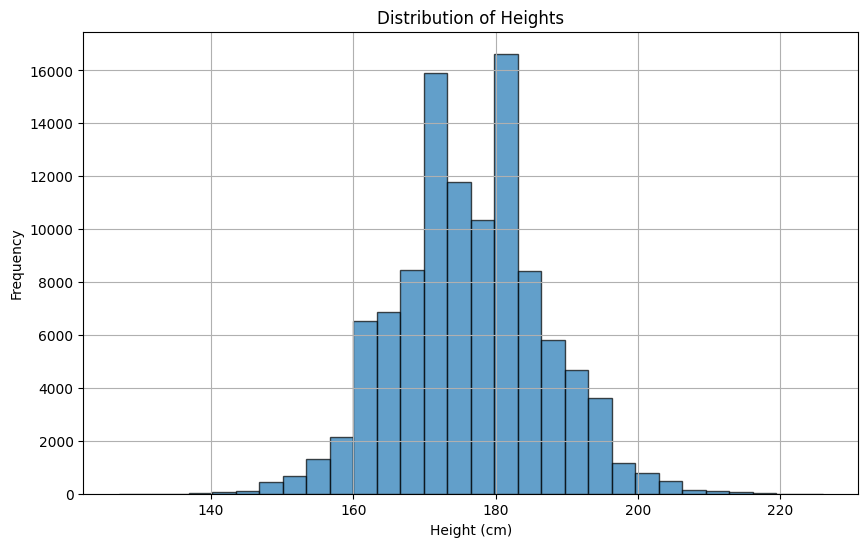

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming bios DataFrame is already loaded
# Example: bios = pd.read_csv('path_to_your_file.csv')

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(bios['height_cm'].dropna(), bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Heights')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()